# Étude de la potabilité de l'eau

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



## Analyse exploratoire des données

Le dataset contient 9 mesures de la qualité de l'eau pour 3276 étendues d'eau différentes : 
- ph -> mesure l'acidité ou l'alcalinité de l'eau
- Hardness -> due principalement à la présence de calcium et magnésium
- Solids -> mesure la quantité totale de minéraux dissous
- Chloramines -> sous-produits de la chloration avec de l'ammoniaque 
- Sulfate -> présents naturellement dans les eaux souterraines et minérales 
- Conductivity -> indique la capacité de l'eau à conduire un courant électrique 
- Organic_carbon -> quantité de carbonne issu de composés organiques dans l'eau 
- Trihalomethanes -> composés formés lors de la chloration de l'eau contenant de la matière organique
- Turbidity -> mesure des particules en suspension qui diffusent la lumière
- Potability -> cible : indicateur binaire : 1, 0 = non potable


### Informations principales du dataset

#### Affichage des 5 premières lignes

In [267]:
df = pd.read_csv('data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Types de données

In [268]:
print("Types de colonnes :")
print(df.dtypes)

Types de colonnes :
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


#### Valeurs manquantes

In [269]:
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

print("\nPourcentage de valeurs nulles :")
print((df.isnull().sum() / len(df)) * 100)



Valeurs manquantes par colonne :
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Pourcentage de valeurs nulles :
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


Nous pouvons observer que nous avons des données manquantes dans le dataset (ph, sulfate et trihalomethanes) nous allons les traiter plus tard.

#### Visualisation des données manquantes

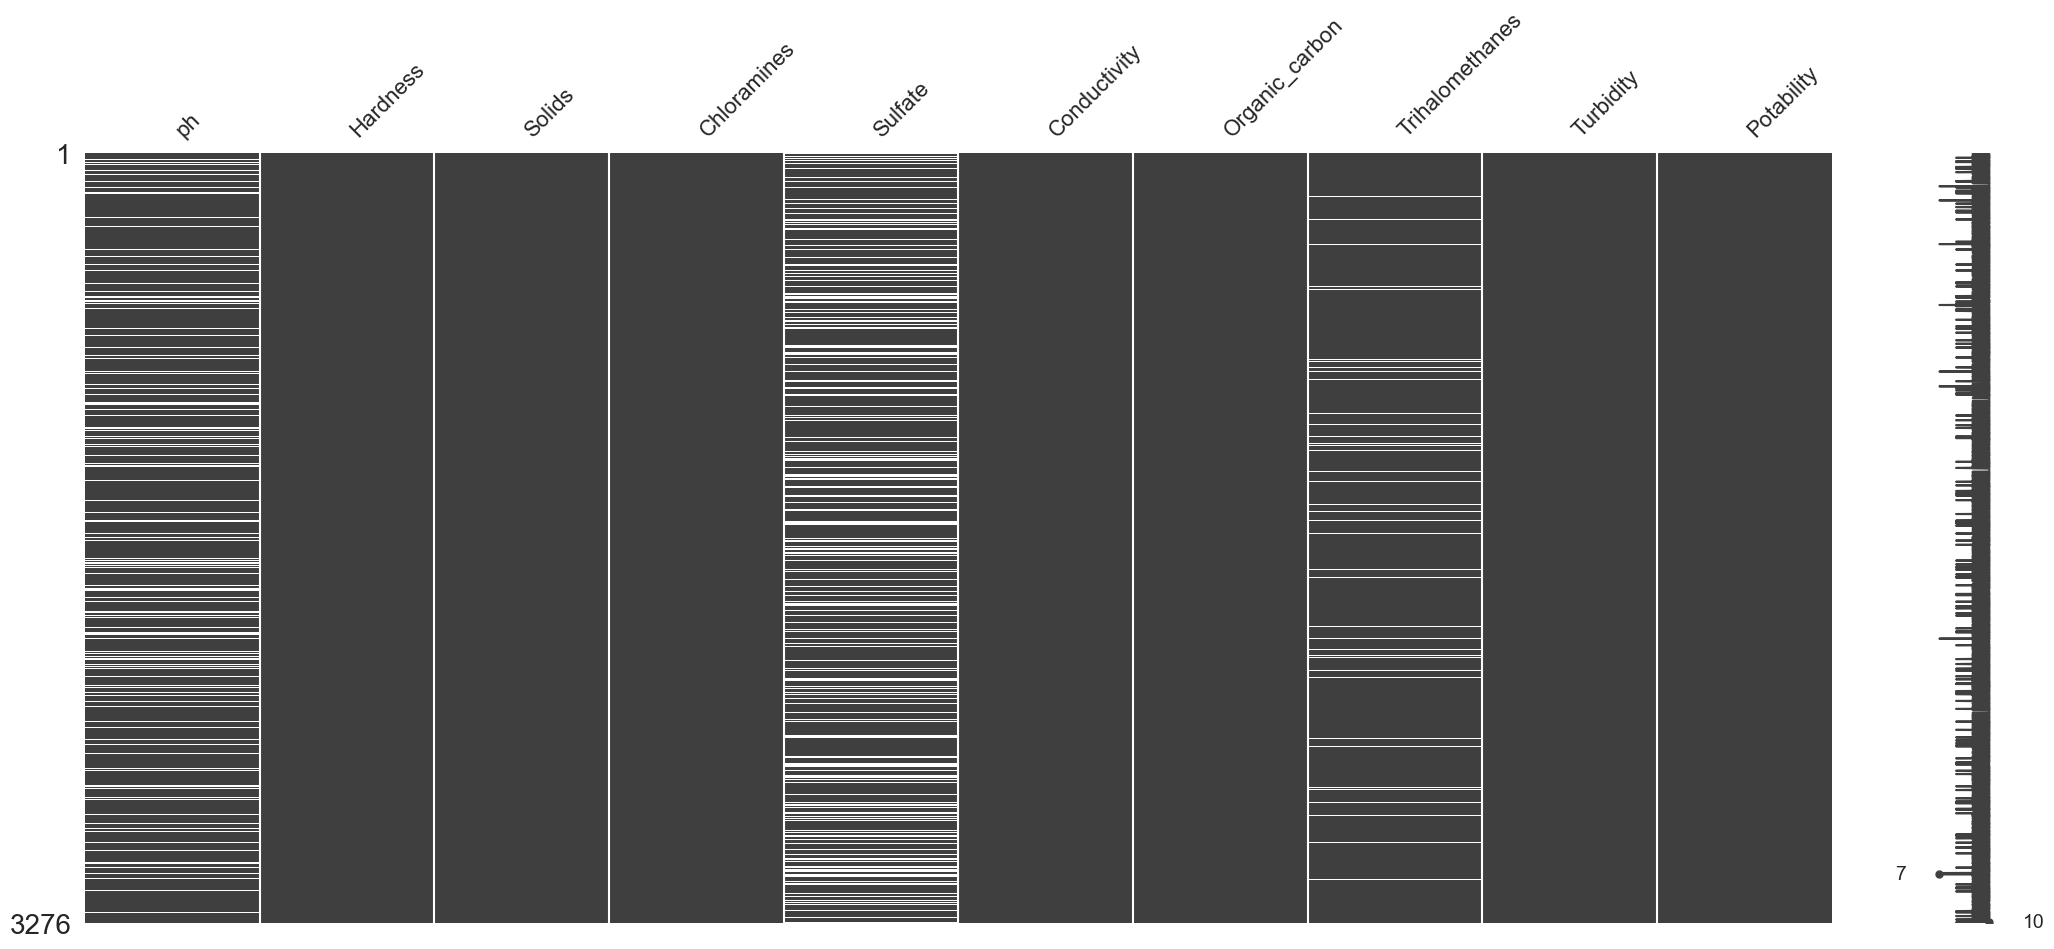

In [270]:
msno.matrix(df)
plt.show()

#### Statistiques descriptives

In [271]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Analyse des distributions

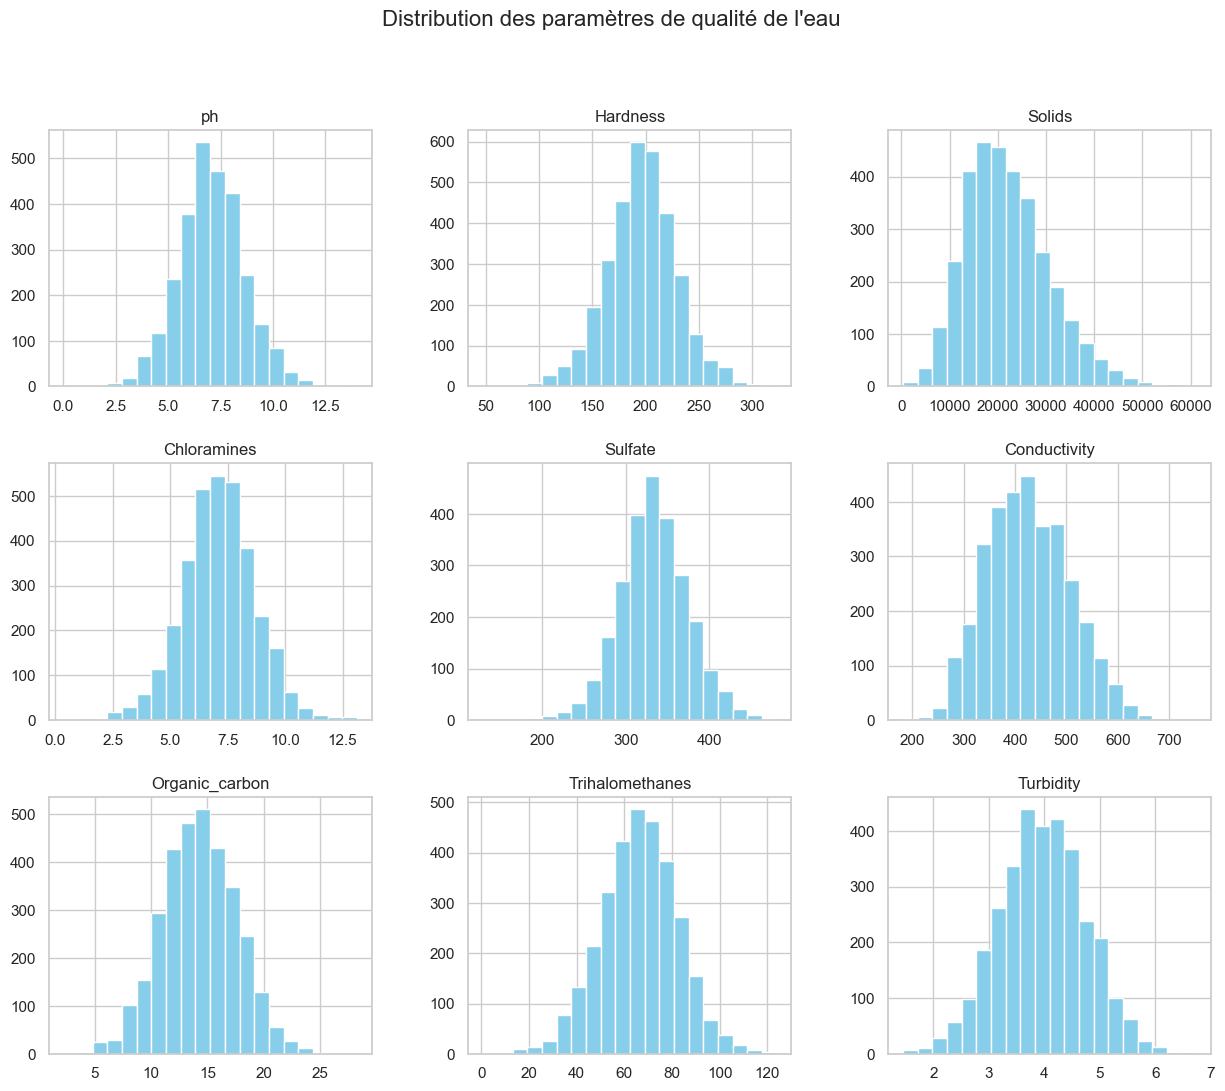

In [272]:
df_feature = df.drop(columns=['Potability'])
df_feature.hist(bins=20, figsize=(15, 12), color='skyblue')
plt.suptitle("Distribution des paramètres de qualité de l'eau", fontsize=16)
plt.show()

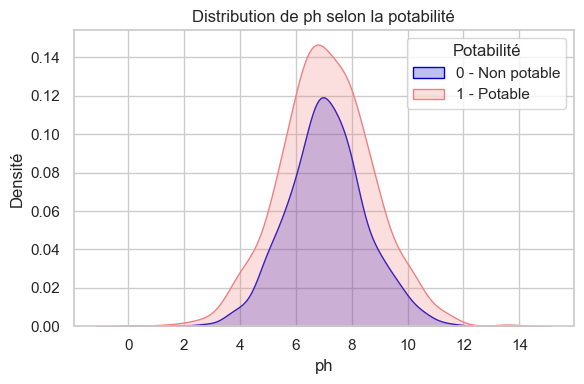

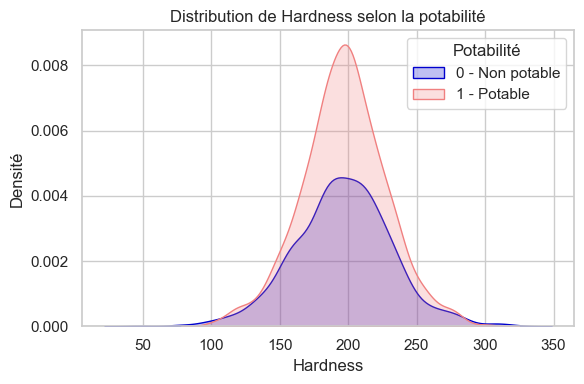

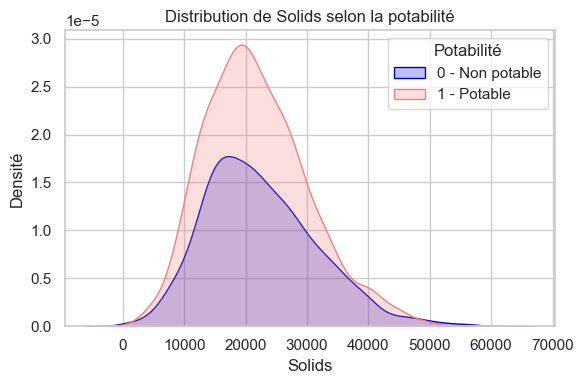

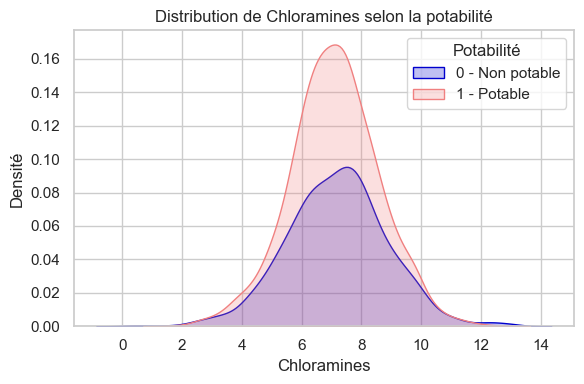

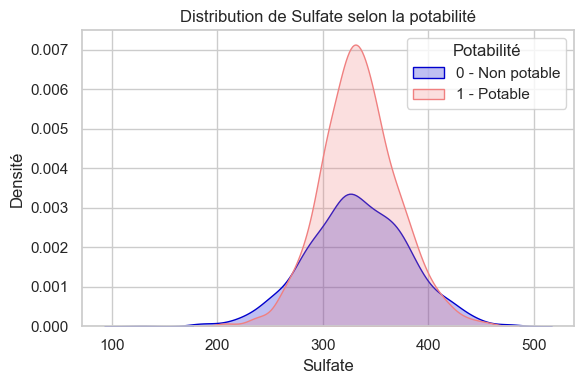

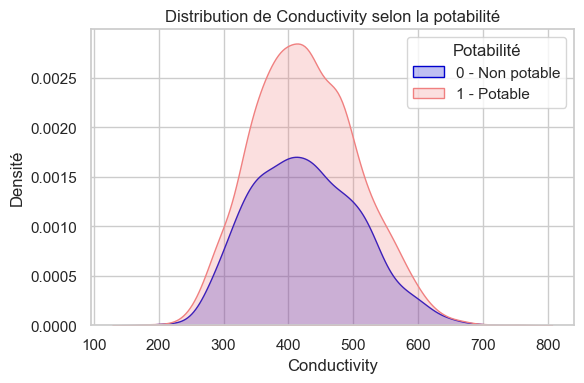

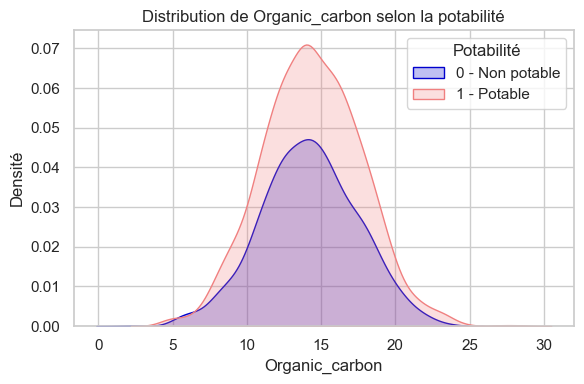

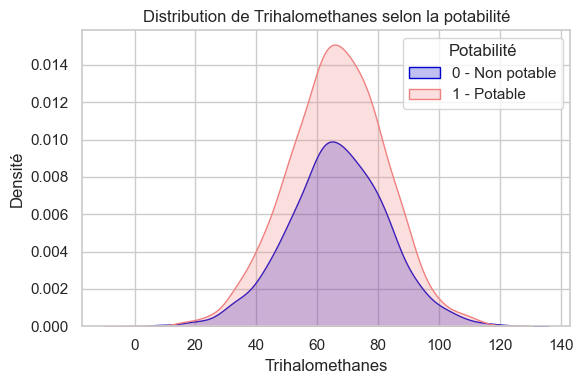

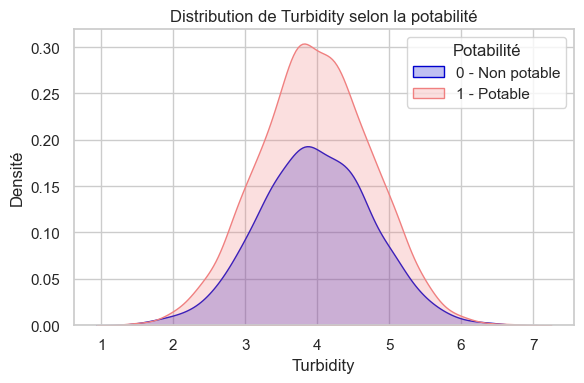

In [273]:
palette = {0: "lightcoral", 1: "mediumblue"}

for col in df_feature.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue="Potability", fill=True, palette=palette)
    plt.title(f"Distribution de {col} selon la potabilité")
    plt.xlabel(col)
    plt.ylabel("Densité")
    plt.legend(title="Potabilité", labels=["0 - Non potable", "1 - Potable"])
    plt.tight_layout()
    plt.show()

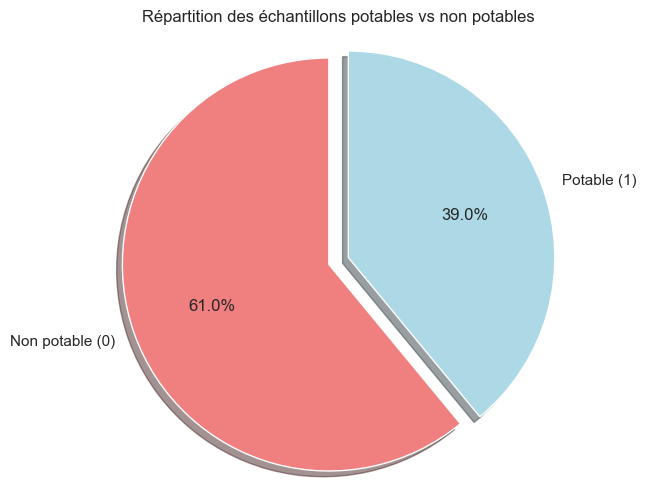

In [274]:
potability_counts = df['Potability'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    potability_counts,
    labels=["Non potable (0)", "Potable (1)"],
    autopct="%1.1f%%",
    colors=["lightcoral", "lightblue"],
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True
)
plt.title("Répartition des échantillons potables vs non potables")
plt.axis("equal") 
plt.show()

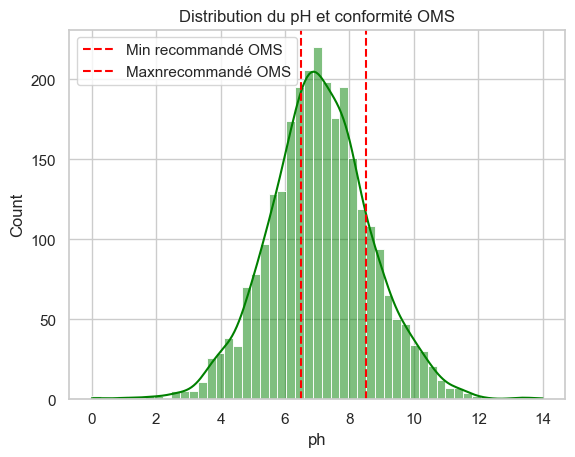

In [275]:
sns.histplot(df["ph"], kde=True, color="green")
plt.axvline(6.5, color='red', linestyle='--', label='Min recommandé OMS')
plt.axvline(8.5, color='red', linestyle='--', label='Maxnrecommandé OMS')
plt.title("Distribution du pH et conformité OMS")
plt.legend()
plt.show()


### Corrélations

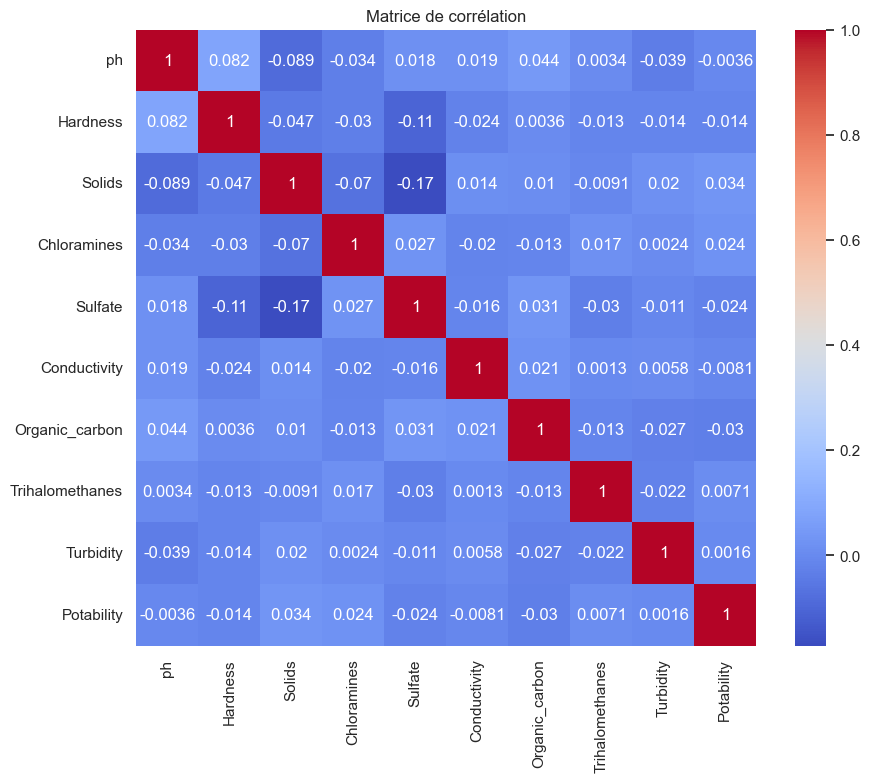

In [276]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


### PCA

### Transformation des valeurs manquantes

Les variables 'ph', 'Sulfate' et 'Trihalomethanes' contiennent des valeurs manquantes.
Pour ph et Trihalomethanes, nous utilisons la moyenne par classe de potabilité (0 ou 1), car leurs distributions sont symétriques.
Pour Sulfate, dont la distribution est légèrement biaisée, nous utilisons la médiane par classe, plus robuste aux valeurs extrêmes.

In [277]:
df["ph"] = df.groupby("Potability")["ph"].transform(lambda x: x.fillna(x.mean()))
df["Trihalomethanes"] = df.groupby("Potability")["Trihalomethanes"].transform(lambda x: x.fillna(x.mean()))
df["Sulfate"] = df.groupby("Potability")["Sulfate"].transform(lambda x: x.fillna(x.median()))


#### Standardisation des données

In [278]:
X = df.drop(columns="Potability")
y = df["Potability"]

In [279]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


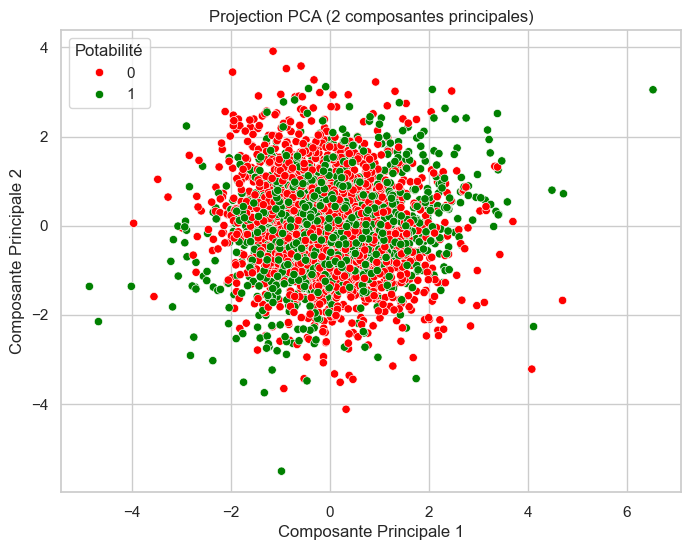

In [280]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Potability"] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Potability", palette=["red", "green"])
plt.title("Projection PCA (2 composantes principales)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.legend(title="Potabilité")
plt.grid(True)
plt.show()


On peut observer que les classes ne sont pas clairement séparables, on peut donc visualiser la difficulté de la tâche.


In [281]:
print("Variance expliquée par chaque composante :")
print(pca.explained_variance_ratio_)
print(f"Variance totale expliquée : {pca.explained_variance_ratio_.sum():.2%}")


Variance expliquée par chaque composante :
[0.13338162 0.12630633]
Variance totale expliquée : 25.97%


On peut confirmer que la projection en 2D ne capture qu'une partie limitée de l'information globale, nous allons donc exploiter l'ensemble des variables d'origine, via un modèle non linéaire comme XGBoost.

## Mise en place de MLFlow 

### Qu'est ce que MLFlow ?

MLflow est une plateforme open source qui permet de gérer le cycle de vie des modèles de Machine Learning. En particulier, grâce à MLflow, les modèles qui ont été entraînés à une date spécifique ainsi que les hyper-paramètres associés pourront être stockés, monitorés et réutilisés de manière efficace.

Un des principaux avantages est l'intégration avec des frameworks Python existants comme Scikit-Learn, XGBoost ou encore TensorFlow, rendant l'outil utilisable dans de nombreuses situations. De plus, son API Python est simple à utiliser, permettant de l'intégrer rapidement dans des projets existants.

La réalisation d’un projet de Machine Learning (ML) est compliquée pour les équipes en science des données. Elles sont confrontées à plusieurs défis.

Tout d’abord, il y a de nombreux outils et versions différents utilisés depuis la préparation des données jusqu’à l’entraînement des modèles. Cela peut causer des problèmes de compatibilité et de gestion.

Ensuite, il est difficile de suivre et de comprendre comment les modèles de ML sont entraînés en raison de la multitude de paramètres possibles. Que vous travailliez seul ou en équipe, savoir exactement comment chaque modèle a été entraîné devient un casse-tête.

De plus, il est souvent difficile de réutiliser le code sans des instructions détaillées. Que vous partagiez votre code avec un développeur pour une utilisation en production ou que vous deviez revenir sur un projet antérieur pour le débugger, il est essentiel de pouvoir reproduire les étapes du processus de ML.

Enfin, mettre un modèle en production peut être compliqué en raison des nombreux outils de déploiement et des environnements variés requis, ainsi que le développement en continue du modèle avec l’intégration de nouvelles données. Cela ajoute une couche de complexité supplémentaire au processus global.

src : http://datascientest.com/mlflow-tout-savoir

In [282]:
import mlflow
from mlflow import MlflowClient
from mlflow.models.signature import infer_signature


### Connexion au serveur MLFlow 

Avant de lancer l’enregistrement d’un run, on connecte notre script au serveur MLflow local (interface accessible via http://127.0.0.1:5000).  
Ensuite, on crée une expérience nommée `"water_potability_xgboost"` dans laquelle seront regroupés tous nos essais de modèles XGBoost pour ce projet.

In [283]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("water_potability_xgboost")

<Experiment: artifact_location='mlflow-artifacts:/270522887424272907', creation_time=1751639059313, experiment_id='270522887424272907', last_update_time=1751639059313, lifecycle_stage='active', name='water_potability_xgboost', tags={}>

On sépare le dataset en un ensemble d'entraînement (80%) et un ensemble de test (20%) en veillant à conserver la **même proportion de classes** (potable / non potable) dans les deux ensembles grâce à `stratify=y`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#### Premier test de modèle XGBoost 


On définit les **hyperparamètres** du modèle XGBoost :
- `n_estimators` : nombre d’arbres
- `max_depth` : profondeur maximale de chaque arbre
- `learning_rate` : vitesse d’apprentissage
- `eval_metric` : métrique d'évaluation utilisée en interne par XGBoost
- `random_state` : pour garantir la reproductibilité
- `use_label_encoder=False` : nécessaire depuis les dernières versions de XGBoost pour éviter un warning

In [ ]:
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 0.1,
    "random_state": 42,
    "use_label_encoder": False,
    "eval_metric": "logloss"
}

Dans cette cellule, nous effectuons notre **premier run expérimental** avec MLflow :

1. **Démarrage du run** avec `mlflow.start_run()` en lui donnant un nom (`xgboost_run_1`)
2. **Entraînement du modèle XGBoost** avec les hyperparamètres définis précédemment
3. **Prédictions sur les données de test**
4. **Calcul des métriques de performance** : accuracy, précision, rappel, F1-score et AUC
5. **Enregistrement des hyperparamètres et métriques** dans MLflow grâce aux fonctions `log_params()` et `log_metric()`
6. **Création d’une signature d’entrée/sortie** pour documenter ce que le modèle attend comme données
7. **Enregistrement du modèle XGBoost** dans MLflow avec son artefact, signature et un exemple concret d’entrée
8. **Ajout d’un tag descriptif** pour retrouver facilement le run dans l’interface

Ce run servira de **référence de base** pour les prochains tests, dans lesquels nous ferons varier les hyperparamètres ou la préparation des données pour améliorer les résultats.

In [285]:
with mlflow.start_run(run_name="xgboost_run_1"):
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    mlflow.log_params(params)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc_auc)

    signature = infer_signature(X_train, model.predict(X_train))
    input_example = X_train.iloc[:5]

    mlflow.xgboost.log_model(
        model,
        artifact_path="model",
        signature=signature,
        input_example=input_example,
        registered_model_name="water_potability_xgb"
    )

    mlflow.set_tag("type", "xgboost_classification")
    print("Modèle enregistré avec succès dans MLflow !")


c:\Users\anton\Documents\Développement I.A\Plateforme_Projects\Machine Learning - Deep Learning\waterflow\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:46:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/07/04 16:46:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\anton\Documents\Développement I.A\Plateforme_Projects\Machine Learning - Deep Learning\waterflow\env\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [16:46:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
Registered model 'water_potability_xgb' already exists. Creating a new version of this model...
2025/07/04 16:46:30 INFO mlflow.s

Modèle enregistré avec succès dans MLflow !
🏃 View run xgboost_run_1 at: http://127.0.0.1:5000/#/experiments/270522887424272907/runs/a253aa152e63476eb5422511efc245b0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/270522887424272907


Created version '4' of model 'water_potability_xgb'.
